In [106]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

In [107]:
#Creates new dataframe from csv file on Desktop

complaints = pd.read_csv('/Users/rng/Desktop/complaints.csv') #Use this file path if Mac and 'C:\\Users\\rng\\Desktop\\emails.csv' if Windows'
#Syntax: dataframe = pd.read_csv(file_path)

In [108]:
#Show top 5 rows of dataframe ([-X:] for last X rows in dataframe)
complaints[:5]
#Syntax: dataframe[:X]

,complaint_id,date_received,year_month,issue,state
0,9027,2012-01-01,2012-01,Technical Difficulties,TN
1,9022,2012-01-01,2012-01,Technical Difficulties,CA
2,9003,2012-01-01,2012-01,Technical Difficulties,WA
3,9031,2012-01-01,2012-01,Technical Difficulties,CT
4,9012,2012-01-01,2012-01,Technical Difficulties,FL


In [66]:
#Aggregate data by issue

complaints_by_issue = complaints.groupby(by='issue')['complaint_id'].count().reset_index().sort_values(by='complaint_id',ascending=False)
complaints_by_issue 
#Syntax: agg_data = dataframe.groupby(by='aggregator')['agg_metric].agg_method.reset_index()

,issue,complaint_id
3,Technical Difficulties,215572
0,Missing/Incorrect Delivery,146562
2,Product Malfunction,130457
1,Online Checkout Issues,79250


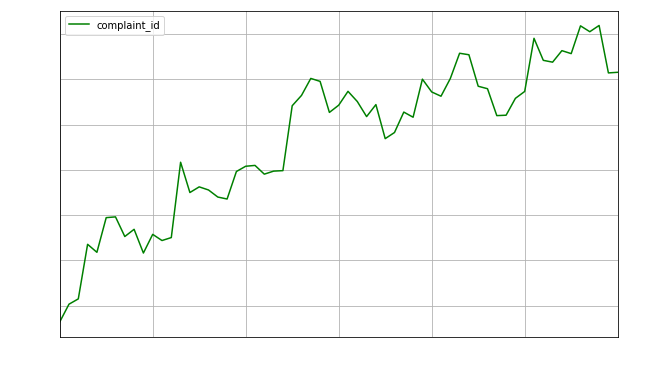

In [67]:
#Aggregate data over time

complaints_by_month = complaints.groupby(by='year_month')['complaint_id'].count().reset_index()
complaints_by_month.set_index(['year_month'],inplace=True) #Redefines index values

#Generate line graph with data
graph = complaints_by_month.plot(kind='line',color='green',grid=True,figsize=(10,6)) #Defines graph function
graph.set_facecolor('none') #Set background to transparent
graph.set_ylabel('# of Inquiries',color='white') #Sets y axis to 'Frequency' and label color white
graph.set_xlabel('Date',color='white') #Sets x axis to 'Date' and label color white
graph.tick_params(colors='white')  #Sets font color to white

In [1]:
#Aggregate data over time by issue
complaints_by_month_by_issue = complaints.groupby(by=['year_month','issue'])['complaint_id'].count().unstack().reset_index()
complaints_by_month_by_issue.set_index(['year_month'],inplace=True) #Redefines index values

#Generate line graph with data
graph = complaints_by_month_by_issue.plot(kind='line',grid=True,figsize=(10,6))
graph.set_facecolor('none') #Set background to transparent
graph.set_ylabel('# of Inquiries',color='white') #Sets y axis to 'Frequency' and label color white
graph.set_xlabel('Date',color='white') #Sets x axis to 'Date' and label color white
graph.tick_params(colors='white')  #Sets font color to white

NameError: name 'complaints' is not defined

In [69]:
#Create Conditional Field from Existing Field
complaints['online_fix'] = np.where((complaints['issue'] == 'Technical Difficulties')
                                   |(complaints['issue'] == 'Online Checkout Issues'),
                                    True, False)        
#Syntax: new_field = np.where(logical_argument,value_if_true,value_if_false)

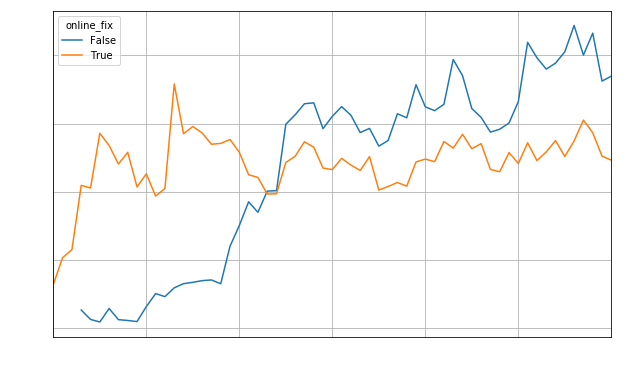

In [70]:
#Aggregate data by type
complaints_by_type = complaints.groupby(['year_month','online_fix'])['complaint_id'].count().unstack().reset_index()
complaints_by_type.set_index(['year_month'],inplace=True) #Redefines index values

#Generate line graph with data
graph = complaints_by_type.plot(kind='line',grid=True,figsize=(10,6))
graph.set_facecolor('none') #Set background to transparent
graph.set_ylabel('# of Inquiries',color='white') #Sets y axis to 'Frequency' and label color white
graph.set_xlabel('Date',color='white') #Sets x axis to 'Date' and label color white
graph.tick_params(colors='white')  #Sets font color to white

In [90]:
#Create new dataframe from filter
complaints_md = complaints[complaints.issue == 'Missing/Incorrect Delivery']
#Syntax: filtered_dataframe = dataframe[logical_argument]

#Aggregate Data over Time by State
complaints_md_by_state = complaints_md.groupby(by=['state'])['complaint_id'].count().reset_index().sort_values(by='complaint_id',ascending=False)
complaints_md_by_state.columns = ['state','inquiry_count'] #Renames columns
complaints_md_by_state[:5]

,state,inquiry_count
8,CA,18548
53,TX,15663
13,FL,13960
42,NY,9928
15,GA,7236


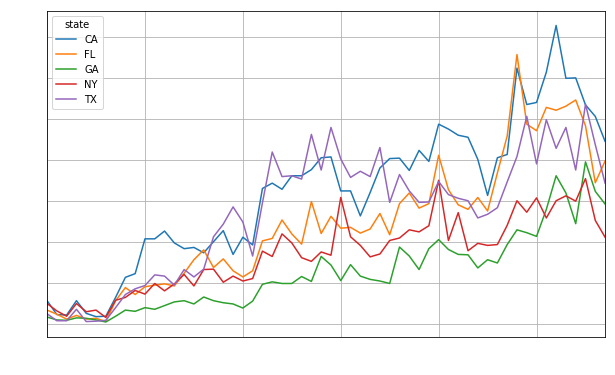

In [116]:
#Create new dataframe from filter - loc alternative
complaints_top_states = complaints_md.loc[complaints_md['state'].isin(['CA','TX','FL','NY','GA'])]
#Syntax: filtered_dataframe = dataframe.loc[dataframe['field'].isin([array_of_values])]

#Aggregate/pivot data over time by state
complaints_top_states_agg = complaints_top_states.groupby(by=['year_month','state'])['complaint_id'].count().unstack().reset_index()
complaints_top_states_agg.set_index(['year_month'],inplace=True) #Redefines index values

graph = complaints_top_states_agg.plot(kind='line',grid=True,figsize=(10,6))
graph.set_facecolor('none') #Set background to transparent
graph.set_ylabel('# of Inquiries',color='white') #Sets y axis to 'Frequency' and label color white
graph.set_xlabel('Date',color='white') #Sets x axis to 'Date' and label color white
graph.tick_params(colors='white')  #Sets font color to white

In [119]:
#Read State Lookup File
state_lookup = pd.read_csv('/Users/rng/Desktop/state_lookup.csv')

complaints_merged = pd.merge(complaints,state_lookup,on='state',how='left')
#Syntax: pd.merge(dataframe_1, dataframe_2, on='common_field',how='merge_type')

In [122]:
complaints_merged

,complaint_id,date_received,year_month,issue,state,state_name
0,9027,2012-01-01,2012-01,Technical Difficulties,TN,Tennessee
1,9022,2012-01-01,2012-01,Technical Difficulties,CA,California
2,9003,2012-01-01,2012-01,Technical Difficulties,WA,Washington
3,9031,2012-01-01,2012-01,Technical Difficulties,CT,Connecticut
4,9012,2012-01-01,2012-01,Technical Difficulties,FL,Florida
5,9030,2012-01-01,2012-01,Technical Difficulties,NJ,New Jersey
6,9020,2012-01-01,2012-01,Technical Difficulties,CA,California
7,9014,2012-01-01,2012-01,Technical Difficulties,CA,California
8,9010,2012-01-01,2012-01,Technical Difficulties,CA,California
9,9011,2012-01-01,2012-01,Technical Difficulties,TX,Texas
